# Exemplo de reamostragem das partículas

In [36]:
import numpy as np

import projeto_pf # Seu trabalho vai aqui
import inspercles
from pf import draw_random_sample

import sys
if (sys.version_info > (3, 0)):
    import importlib
    importlib.reload(projeto_pf) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    reload(projeto_pf)

%matplotlib inline



## Criação das partículas e do robô

In [39]:

particulas = projeto_pf.cria_particulas()
robot = projeto_pf.robot

    
    
    
    

## Mapa com posição inicial

Este desenho é só ilustrativo, você não vai precisar chamar o código de desenho no projeto. Somente precisa criar as funções adequadas em `projeto_pf.py`.

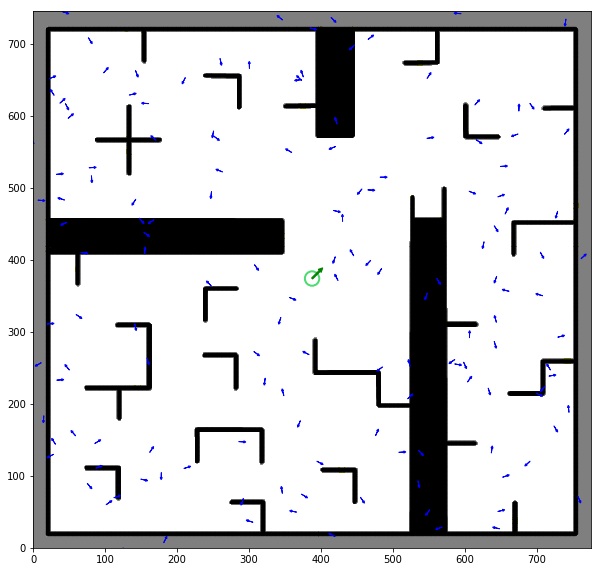

In [40]:
inspercles.nb_draw_map(inspercles.color_image, particles = particulas, pose=robot.pose(), robot=True)

Vamos tornar a distribuição de probabilidade nas partículas bem desequilibrada para observarmos a reamostragem

In [9]:
particulas[0].w = 0.8   # a primeira recebe 80% da probabilidade
for i in range(1, 10):
    particulas[i].w = 0.2/9.0 # As subsequentes 1/9 do que sobrou (20%)

In [10]:
# Vamos separar a informação de posição das partículas para que possamos "ver"  as partículas
particulas_exp = [[p.x, p.y, p.theta] for p in particulas]

particulas_pesos = [np.round(p.w, decimals=3) for p in particulas]

In [11]:
particulas_exp

[[370.85136788916697, 418.9060818078254, 1.6761918602345405],
 [360.56131984813516, 401.022404686701, 0.23162939843614078],
 [368.0186238332836, 361.29225615567816, -0.11742142344587991],
 [380.4506916016769, 349.74204217608303, 1.7401984466376594],
 [415.08908038689947, 331.58501331953664, -0.1135684074740071],
 [379.3206114995354, 346.5384135563157, 0.49067840469203916],
 [433.9805190623281, 356.78172348879775, -0.21425601998853772],
 [425.43675237258776, 386.5331813020386, 1.1115953922473194],
 [427.9691876682122, 351.6748346142651, 0.14320258512420836],
 [377.5998307449841, 370.2421749346346, 0.6347830948451084]]

Vejam como está a distribuição dos pesos

In [12]:
particulas_pesos

[0.8, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022]

## Fazendo a reamostragem

Vamos criar novas partículas reamostrando usando a função `pf.draw_random_sample`

In [13]:
novas_particulas = draw_random_sample(particulas, particulas_pesos, 10)

A probabilidade que está em peso agora o sentido. Precisamos fazer com que todos os pesos novamente virem w=1  (ou $1/n$ como na folha de papel, tanto faz desde que todas fiquem iguais)

In [14]:
for p in novas_particulas:
    p.w = 1

O array *novas_particulas* contém as partículas depois da reamostragem. 

## Depois da reamostragem

Vamos observar os valores das partículas

In [15]:
valores_novas_particulas = [[p.x, p.y, p.theta] for p in novas_particulas]

Observem com a partícula que na geração anterior tinha $80\%$ de probabilidade é muito mais comum agora


**<font color=red>Note que para o projeto a partícula precisa sofrer uma pequena mutação</font>**

In [16]:
valores_novas_particulas

[[370.85136788916697, 418.9060818078254, 1.6761918602345405],
 [370.85136788916697, 418.9060818078254, 1.6761918602345405],
 [370.85136788916697, 418.9060818078254, 1.6761918602345405],
 [370.85136788916697, 418.9060818078254, 1.6761918602345405],
 [370.85136788916697, 418.9060818078254, 1.6761918602345405],
 [380.4506916016769, 349.74204217608303, 1.7401984466376594],
 [370.85136788916697, 418.9060818078254, 1.6761918602345405],
 [379.3206114995354, 346.5384135563157, 0.49067840469203916],
 [370.85136788916697, 418.9060818078254, 1.6761918602345405],
 [433.9805190623281, 356.78172348879775, -0.21425601998853772]]

![](animated.gif)